# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[256, 128, 64]):
    """
    Build your own model
    input_layer = keras.layers.Input(input_shape)
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [ 1e-1, 1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
OPTIMIZER=['sgd','adagrad','rmsprop','adam']


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE :
    for opt in OPTIMIZER :
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = f"exp-lr-{lr}-optimizer-{opt}" 
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with LR = 0.100000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train 

Epoch 41/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.3389 - acc: 0.5281 - val_loss: 1.4355 - val_acc: 0.4854
Epoch 42/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.3284 - acc: 0.5314 - val_loss: 1.4949 - val_acc: 0.4776
Epoch 43/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.3252 - acc: 0.5340 - val_loss: 1.4180 - val_acc: 0.4895
Epoch 44/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.3118 - acc: 0.5378 - val_loss: 1.4299 - val_acc: 0.4872
Epoch 45/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.3069 - acc: 0.5386 - val_loss: 1.4242 - val_acc: 0.4878
Epoch 46/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.3108 - acc: 0.5372 - val_loss: 1.4335 - val_acc: 0.4817
Epoch 47/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.3028 - acc: 0.5415 - val_loss: 1.3988 - val_acc: 0.5048
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 5s 94us/step - loss: 1.2789 - acc: 0.5458 - val_loss: 1.4351 - val_acc: 0.4888
Epoch 43/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.2732 - acc: 0.5489 - val_loss: 1.3934 - val_acc: 0.5084
Epoch 44/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.2677 - acc: 0.5500 - val_loss: 1.4038 - val_acc: 0.5041
Epoch 45/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.2630 - acc: 0.5530 - val_loss: 1.4336 - val_acc: 0.4927
Epoch 46/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.2586 - acc: 0.5550 - val_loss: 1.4068 - val_acc: 0.4982
Epoch 47/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.2525 - acc: 0.5546 - val_loss: 1.4208 - val_acc: 0.4965
Epoch 48/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2476 - acc: 0.5589 - val_loss: 1.5001 - val_acc: 0.4716
Epoch 49/50
50000/50000 [====================

50000/50000 [==============================] - 5s 96us/step - loss: 1.1294 - acc: 0.5954 - val_loss: 1.5261 - val_acc: 0.4901
Epoch 44/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.1201 - acc: 0.5985 - val_loss: 1.5109 - val_acc: 0.4999
Epoch 45/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.1145 - acc: 0.6029 - val_loss: 1.6703 - val_acc: 0.4613
Epoch 46/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.1079 - acc: 0.6041 - val_loss: 1.5624 - val_acc: 0.4809
Epoch 47/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.1005 - acc: 0.6080 - val_loss: 1.5596 - val_acc: 0.4807
Epoch 48/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.0948 - acc: 0.6082 - val_loss: 1.5702 - val_acc: 0.4893
Epoch 49/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.0871 - acc: 0.6107 - val_loss: 1.6352 - val_acc: 0.4634
Epoch 50/50
50000/50000 [===================

50000/50000 [==============================] - 5s 99us/step - loss: 0.9861 - acc: 0.6498 - val_loss: 1.4423 - val_acc: 0.5297
Epoch 45/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.9780 - acc: 0.6510 - val_loss: 1.4385 - val_acc: 0.5271
Epoch 46/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.9673 - acc: 0.6553 - val_loss: 1.4649 - val_acc: 0.5166
Epoch 47/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.9627 - acc: 0.6554 - val_loss: 1.4854 - val_acc: 0.5167
Epoch 48/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.9686 - acc: 0.6534 - val_loss: 1.4486 - val_acc: 0.5218
Epoch 49/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.9456 - acc: 0.6626 - val_loss: 1.4893 - val_acc: 0.5134
Epoch 50/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.9376 - acc: 0.6646 - val_loss: 1.4973 - val_acc: 0.5212
Experiment with LR = 0.010000
__________

50000/50000 [==============================] - 4s 83us/step - loss: 1.3091 - acc: 0.5399 - val_loss: 1.4286 - val_acc: 0.4909
Epoch 46/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.3012 - acc: 0.5418 - val_loss: 1.6794 - val_acc: 0.4170
Epoch 47/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.2986 - acc: 0.5423 - val_loss: 1.4291 - val_acc: 0.4973
Epoch 48/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.2882 - acc: 0.5455 - val_loss: 1.4630 - val_acc: 0.4816
Epoch 49/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.2877 - acc: 0.5466 - val_loss: 1.3748 - val_acc: 0.5095
Epoch 50/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.2786 - acc: 0.5511 - val_loss: 1.4980 - val_acc: 0.4817
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)  

50000/50000 [==============================] - 5s 102us/step - loss: 1.2541 - acc: 0.5596 - val_loss: 1.4162 - val_acc: 0.5011
Epoch 47/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.2508 - acc: 0.5601 - val_loss: 1.4132 - val_acc: 0.4987
Epoch 48/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.2452 - acc: 0.5643 - val_loss: 1.4290 - val_acc: 0.4996
Epoch 49/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.2413 - acc: 0.5623 - val_loss: 1.3928 - val_acc: 0.5134
Epoch 50/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.2382 - acc: 0.5652 - val_loss: 1.4689 - val_acc: 0.4847
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)     

50000/50000 [==============================] - 5s 99us/step - loss: 1.1085 - acc: 0.6016 - val_loss: 1.6204 - val_acc: 0.4642
Epoch 48/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.1000 - acc: 0.6065 - val_loss: 1.5731 - val_acc: 0.4832
Epoch 49/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.0911 - acc: 0.6085 - val_loss: 1.5627 - val_acc: 0.4907
Epoch 50/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.0878 - acc: 0.6121 - val_loss: 1.5384 - val_acc: 0.4867
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None

50000/50000 [==============================] - 6s 126us/step - loss: 0.9890 - acc: 0.6467 - val_loss: 1.4869 - val_acc: 0.5065
Epoch 49/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.9835 - acc: 0.6493 - val_loss: 1.4286 - val_acc: 0.5212
Epoch 50/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.9664 - acc: 0.6560 - val_loss: 1.4547 - val_acc: 0.5191
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 6

50000/50000 [==============================] - 5s 90us/step - loss: 1.2791 - acc: 0.5497 - val_loss: 1.4514 - val_acc: 0.4728
Epoch 50/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.2766 - acc: 0.5507 - val_loss: 1.3652 - val_acc: 0.5166
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)       

50000/50000 [==============================] - 4s 85us/step - loss: 1.3048 - acc: 0.5401 - val_loss: 1.4138 - val_acc: 0.4989
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
______________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.9143 - acc: 0.3100 - val_loss: 1.7939 - val_acc: 0.3604
Epoch 2/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.7174 - acc: 0.3866 - val_loss: 1.7121 - val_acc: 0.3897
Epoch 3/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.6324 - acc: 0.4178 - val_loss: 1.5909 - val_acc: 0.4357
Epoch 4/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5735 - acc: 0.4381 - val_loss: 1.5559 - val_acc: 0.4489
Epoch 5/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.5216 - acc: 0.4551 - val_loss: 1.5409 - val_acc: 0.4518
Epoch 6/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.4878 - acc: 0.4707 - val_loss: 1.5729 - val_acc: 0.4343
Epoch 7/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.4605 - acc: 0.4794 - val_loss: 1.4741 - v

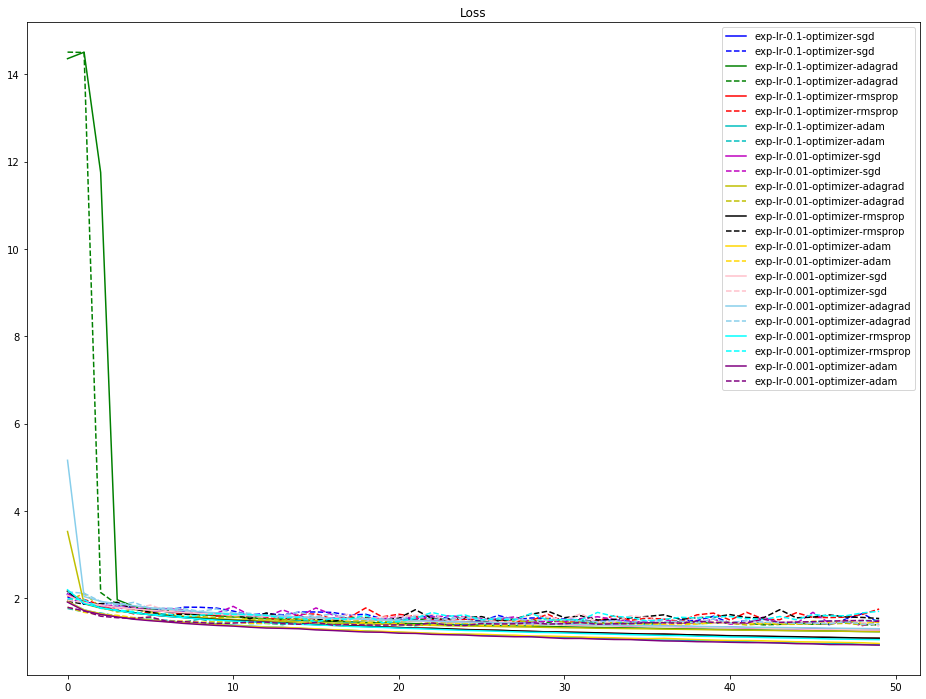

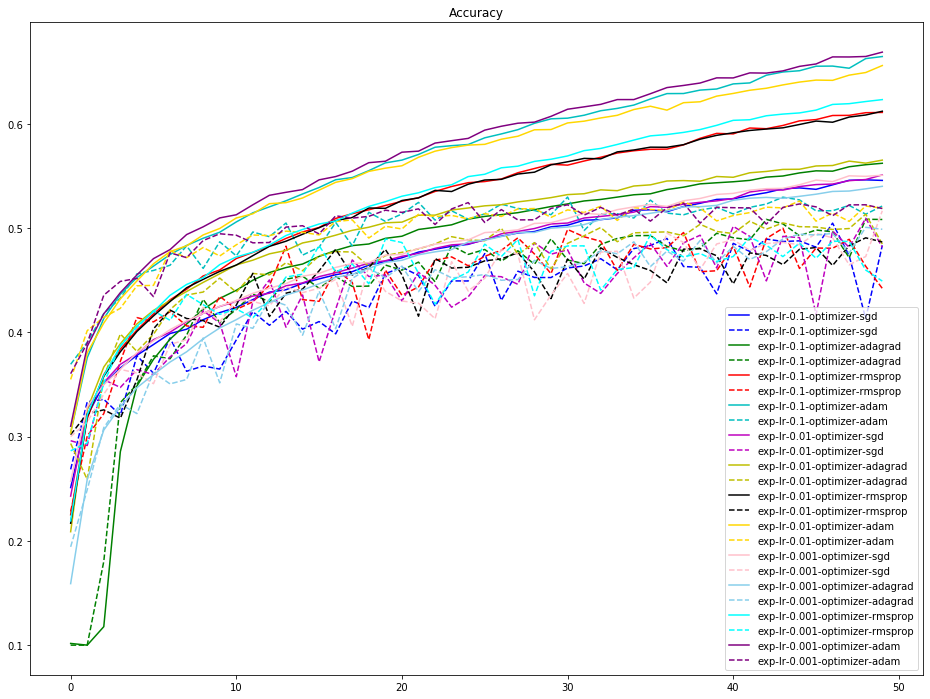

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'gold',"pink","skyblue","aqua","purple"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.savefig('Loss.png')
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.savefig('Accuracy.png')
plt.show()